# IBM HR Analytics Attrition Factors and Predictions

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

Exploring what insights we can gather about employee attrition rate, and see if we can't build a good prediction model

In [313]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

# Format floats without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [314]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,...,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.000,1024.865,2.722,65.891,2.730,2.064,...,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.000,602.024,1.093,20.329,0.712,1.107,...,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,1.000,1.000,30.000,1.000,1.000,...,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.000,491.250,2.000,48.000,2.000,1.000,...,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.000,1020.500,3.000,66.000,3.000,2.000,...,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.000,1555.750,4.000,83.750,3.000,3.000,...,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.000,2068.000,4.000,100.000,4.000,5.000,...,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [315]:
print(data.columns.values)
print("Columns: {0}".format(len(data.columns.values)))

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
Columns: 35


In [316]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Process and Add Some Useful Features

In [317]:
# Useful Features
data['StandardWeeklyHours'] = data.StandardHours / 2  # Add Weekly hours along with biweekly hours
data['Salary'] = data.DailyRate * 5 * 52  # Their Yearly Salary (Assumes 5 days a week)
data['AgeBin'] = pd.cut(data.Age, [x for x in range(17, 70, 2)])
data['SalaryQBin'] = pd.qcut(data.Salary, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
data['DistanceFromHomeBin'] = pd.cut(data.DistanceFromHome, [x for x in range(0, 33, 3)])
data['YearsAtCompanyBin'] = pd.cut(data.YearsAtCompany, [x for x in range(0, 41, 2)])

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,StandardWeeklyHours,Salary,AgeBin,SalaryQBin,DistanceFromHomeBin,YearsAtCompanyBin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,40.000,286520,"(39, 41]","(284596.0, 318292.0]","(0, 3]","(4, 6]"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,40.000,72540,"(47, 49]","(63128.0, 101868.0]","(6, 9]","(8, 10]"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,40.000,356980,"(35, 37]","(352560.0, 389740.0]","(0, 3]",NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,40.000,361920,"(31, 33]","(352560.0, 389740.0]","(0, 3]","(6, 8]"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,40.000,153660,"(25, 27]","(137982.0, 170612.0]","(0, 3]","(0, 2]"


## EDA

#### Attrition - Bivariate with other features

In [318]:
print("Yes: {0}".format(len(data.Attrition[data.Attrition == 'Yes'].values)))
print("No: {0}".format(len(data.Attrition[data.Attrition == 'No'].values)))
mean_attrition_rate = len(data.Attrition[data.Attrition == 'Yes'].values) / len(data.Attrition.values)
normal_buffer = .05
print("Attrition Rate: {0:.4f}".format(mean_attrition_rate))

Yes: 237
No: 1233
Attrition Rate: 0.1612


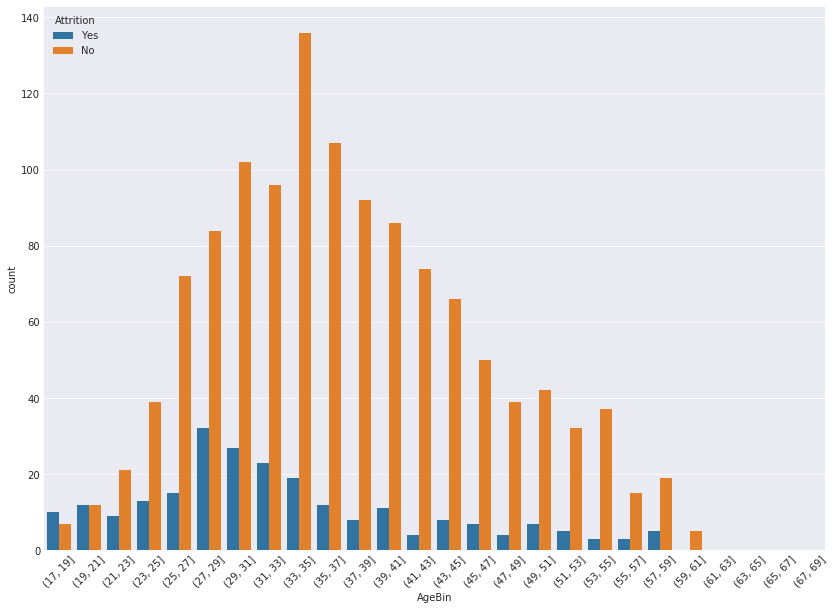

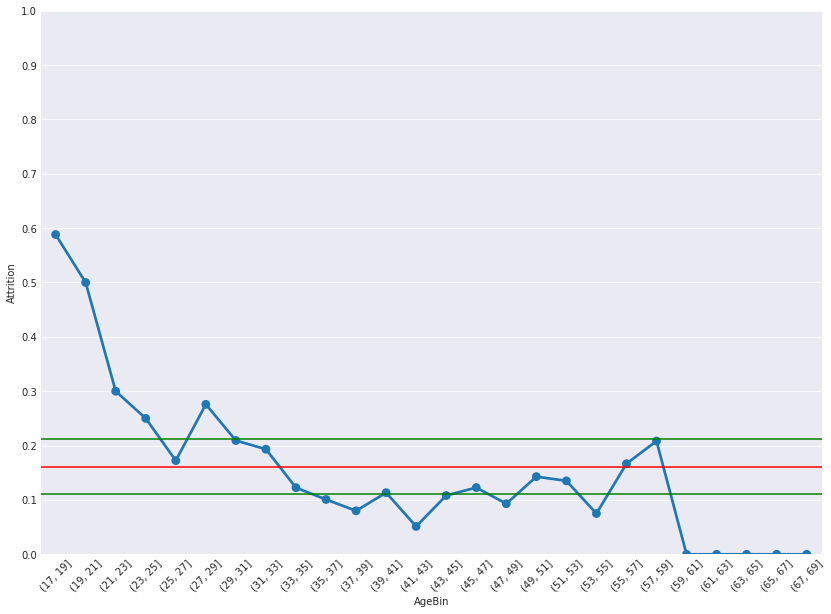

18 - 33 Mean Attrition rate: 0.31
34 - 49 Mean Attrition rate: 0.10


In [335]:
# Age vs Attrition

age_attr_rate = data[data.Attrition == 'Yes'].groupby(['AgeBin'])['Attrition'].count() / data.groupby(['AgeBin'])['Attrition'].count()
age_attr_rate = age_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='AgeBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=age_attr_rate.index, y=age_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("18 - 33 Mean Attrition rate: {0:.2f}".format(age_attr_rate[0:8].mean()))
print("34 - 49 Mean Attrition rate: {0:.2f}".format(age_attr_rate[8:16].mean()))

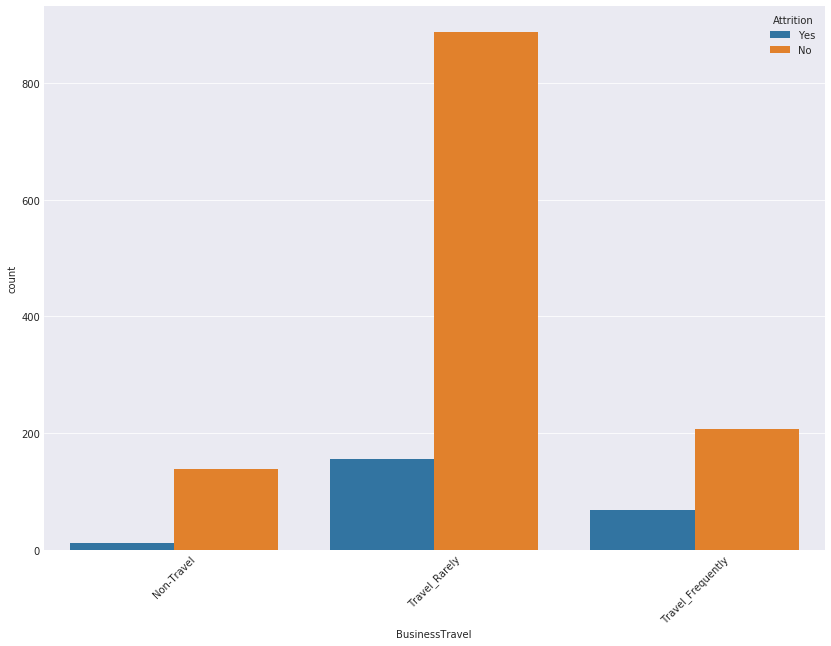

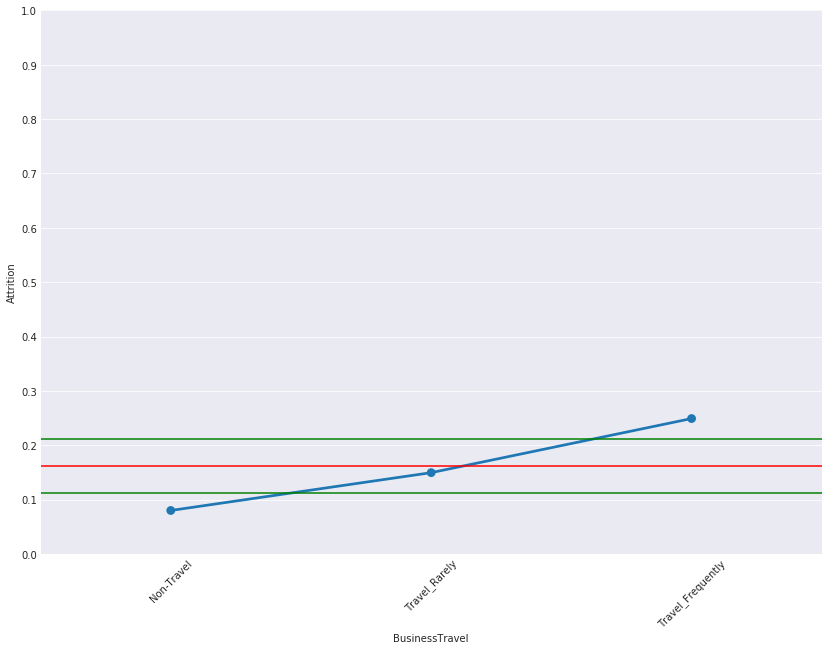

Travel Frequently Attrition rate: 0.25
Non-Travel Attrition rate: 0.08


In [337]:
# Business Travel vs Attrition

bt_attr_rate = data[data.Attrition == 'Yes'].groupby(['BusinessTravel'])['Attrition'].count() / data.groupby(['BusinessTravel'])['Attrition'].count()
bt_attr_rate = bt_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='BusinessTravel', hue='Attrition', data=data, order=bt_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=bt_attr_rate.index, y=bt_attr_rate, order=bt_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Travel Frequently Attrition rate: {0:.2f}".format(bt_attr_rate[1]))
print("Non-Travel Attrition rate: {0:.2f}".format(bt_attr_rate[0]))

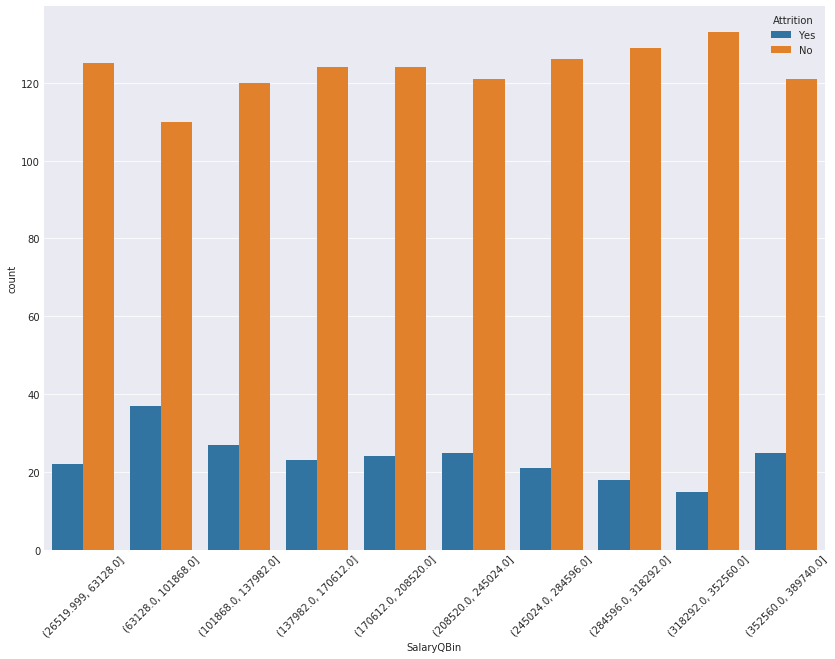

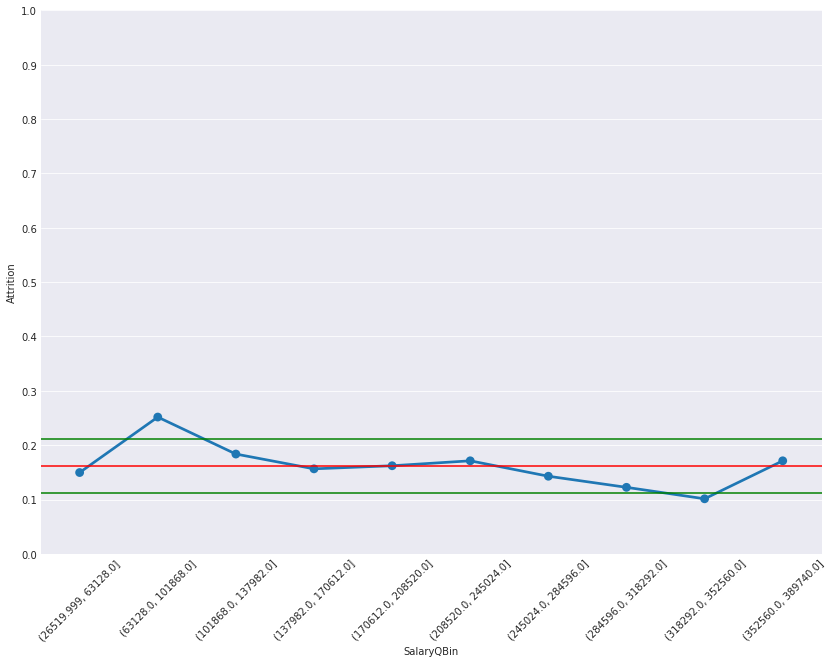

10 - 20 Percentile ($63,128 - $101,868) Attrition rate: 0.25


In [321]:
# Salary (By 10% percentile ranges) vs. Attrition

sal_attr_rate = data[data.Attrition == 'Yes'].groupby(['SalaryQBin'])['Attrition'].count() / data.groupby(['SalaryQBin'])['Attrition'].count()
sal_attr_rate = sal_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='SalaryQBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=sal_attr_rate.index, y=sal_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("10 - 20 Percentile ($63,128 - $101,868) Attrition rate: {0:.2f}".format(sal_attr_rate[1]))

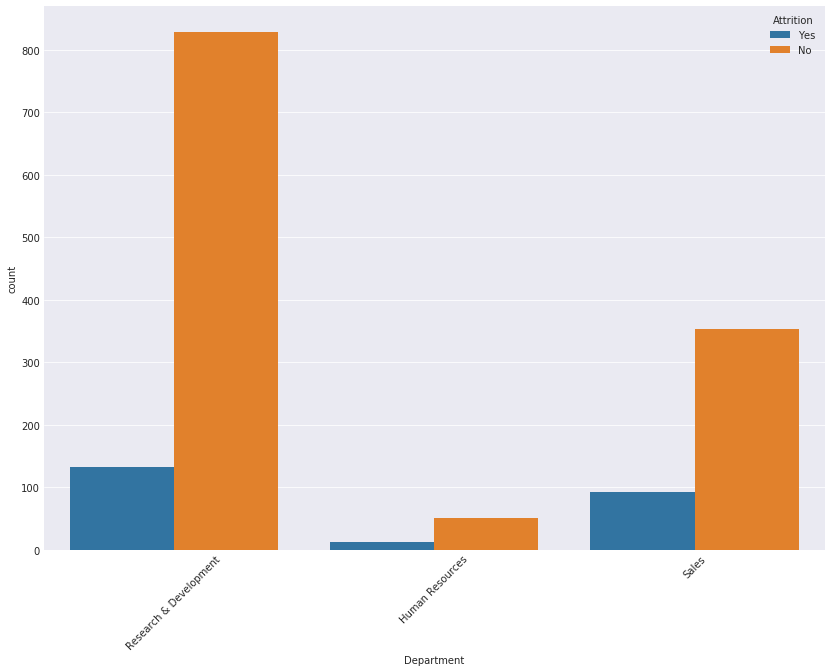

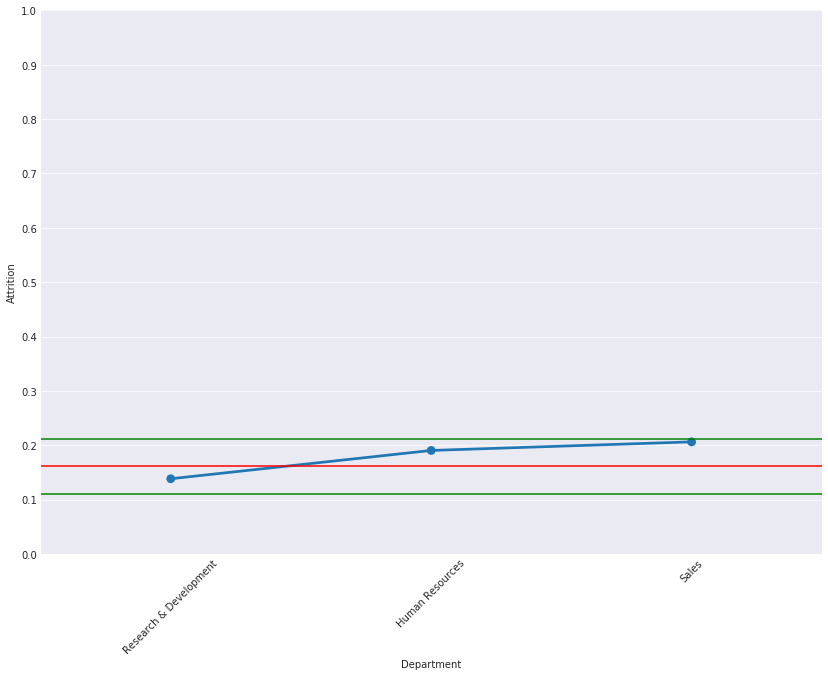

In [322]:
# Department vs Attrition

dept_attr_rate = data[data.Attrition == 'Yes'].groupby(['Department'])['Attrition'].count() / data.groupby(['Department'])['Attrition'].count()
dept_attr_rate = dept_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='Department', hue='Attrition', data=data, order=dept_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=dept_attr_rate.index, y=dept_attr_rate, order=dept_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

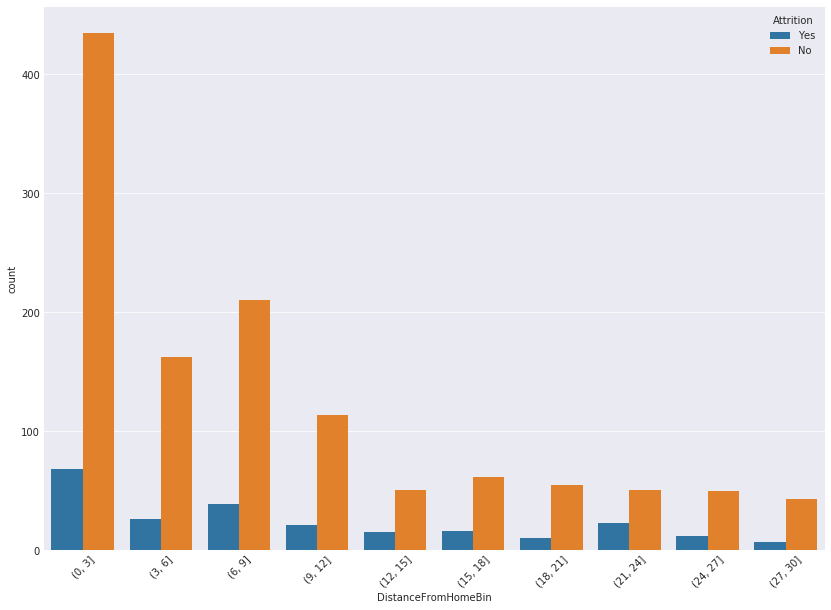

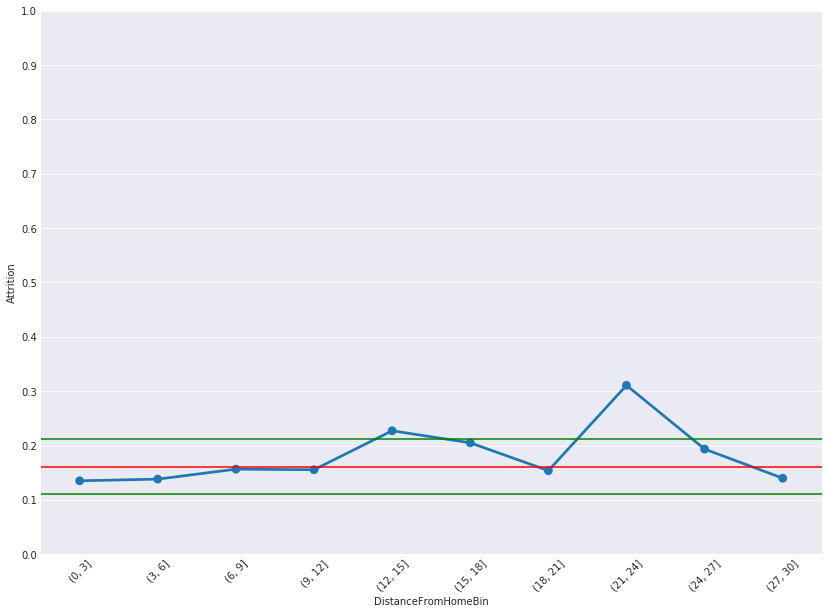

In [323]:
# Distance From Home vs Attrition

dist_attr_rate = data[data.Attrition == 'Yes'].groupby(['DistanceFromHomeBin'])['Attrition'].count() / data.groupby(['DistanceFromHomeBin'])['Attrition'].count()
dist_attr_rate = dist_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='DistanceFromHomeBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=dist_attr_rate.index, y=dist_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

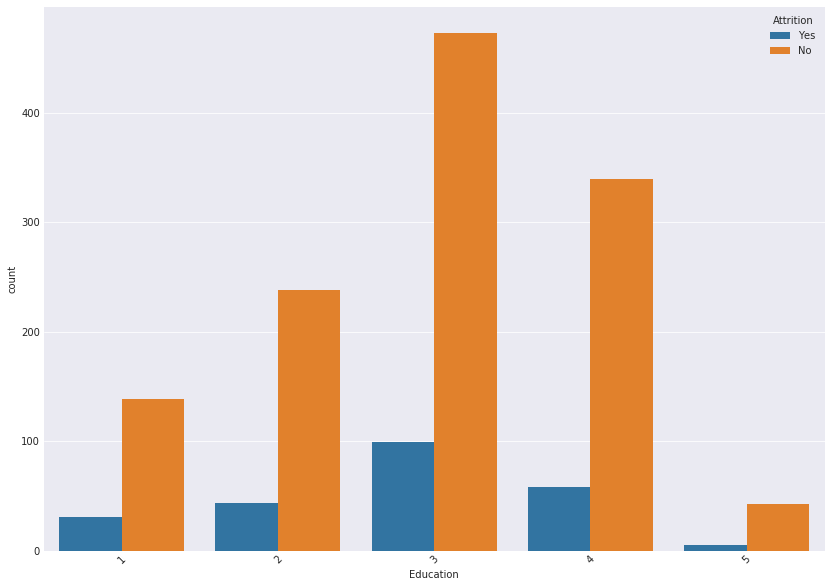

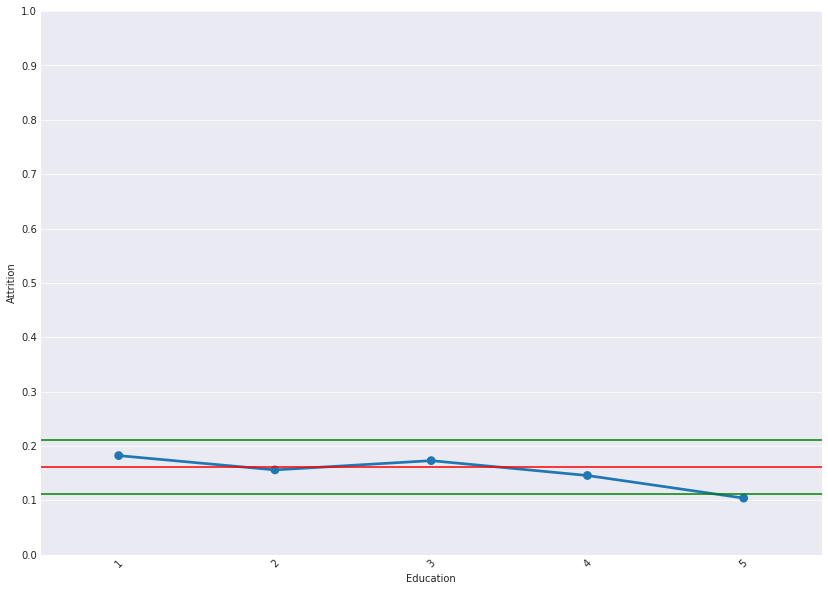

In [324]:
# Education vs. Attrition

edu_attr_rate = data[data.Attrition == 'Yes'].groupby(['Education'])['Attrition'].count() / data.groupby(['Education'])['Attrition'].count()
edu_attr_rate = edu_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='Education', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=edu_attr_rate.index, y=edu_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

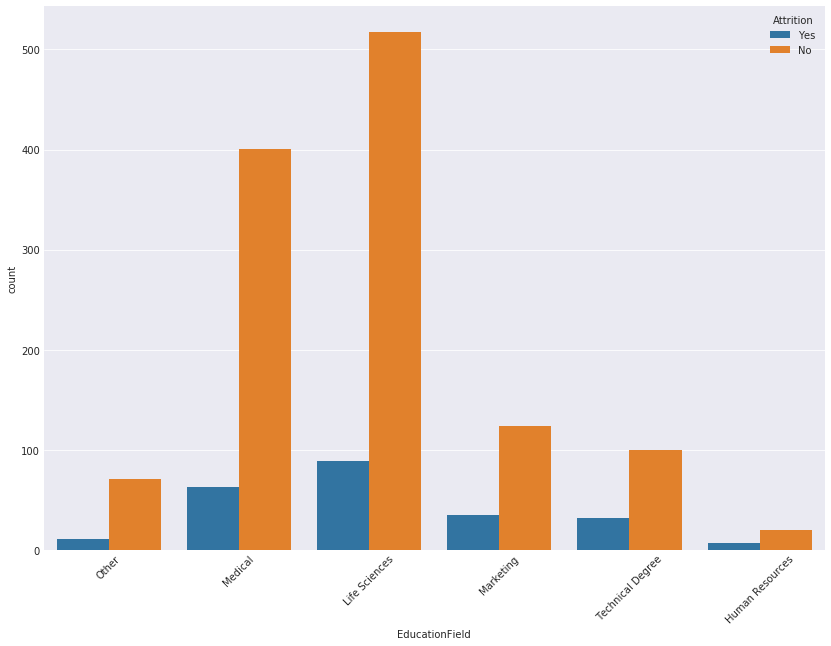

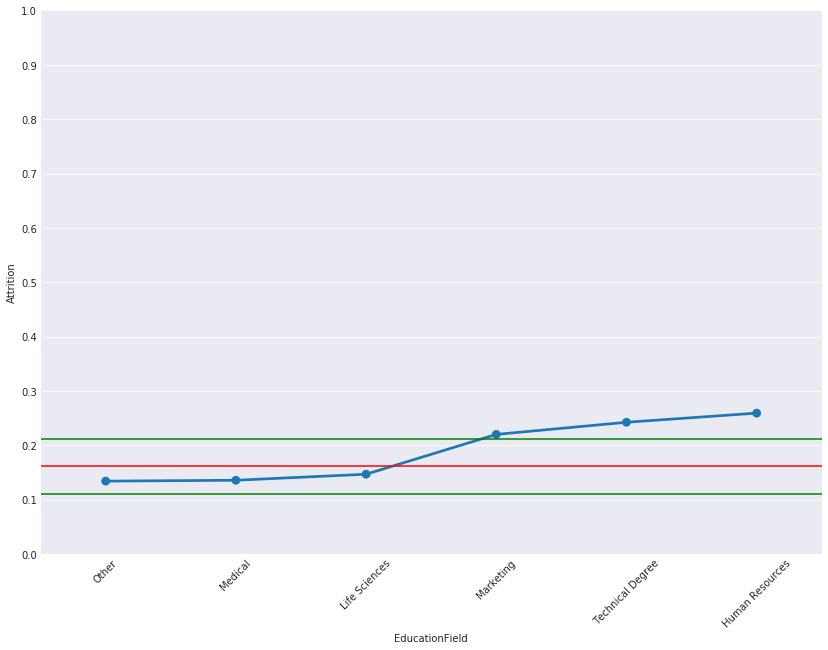

Marketing Attrition rate: 0.22
Technical Degree Attrition rate: 0.24
Human Resources Attrition rate: 0.26


In [325]:
# Education Field vs. Attrition

eduf_attr_rate = data[data.Attrition == 'Yes'].groupby(['EducationField'])['Attrition'].count() / data.groupby(['EducationField'])['Attrition'].count()
eduf_attr_rate = eduf_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='EducationField', hue='Attrition', data=data, order=eduf_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=eduf_attr_rate.index, y=eduf_attr_rate, order=eduf_attr_rate.sort_values().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Marketing Attrition rate: {0:.2f}".format(eduf_attr_rate[2]))
print("Technical Degree Attrition rate: {0:.2f}".format(eduf_attr_rate[5]))
print("Human Resources Attrition rate: {0:.2f}".format(eduf_attr_rate[0]))

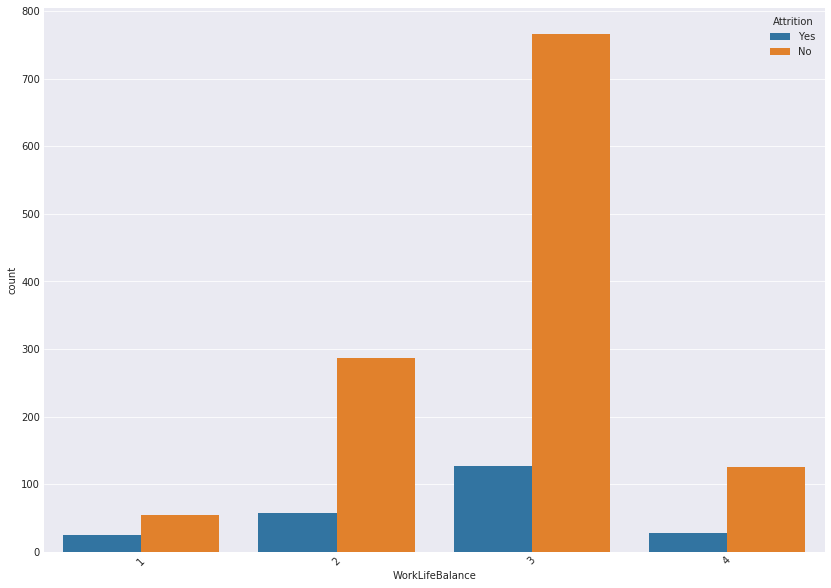

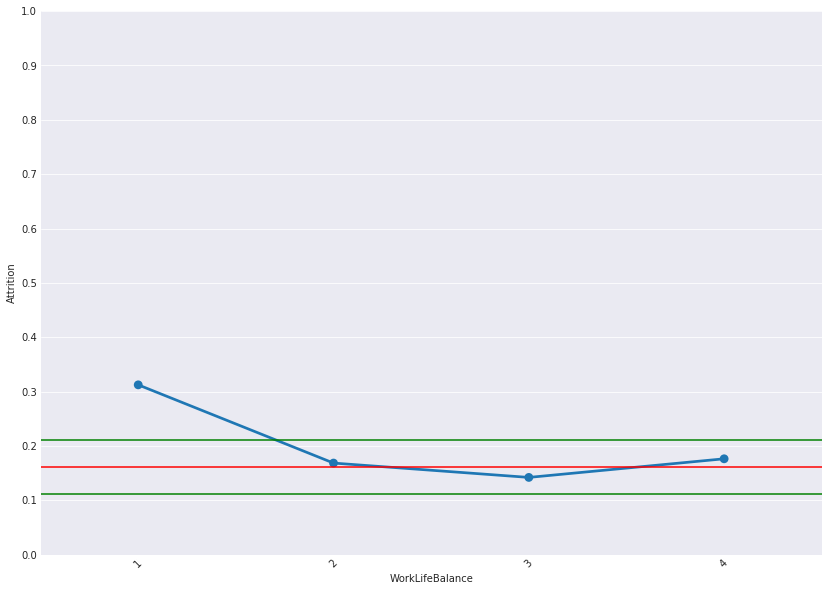

1 Attrition rate: 0.31


In [326]:
# Work Life Balance vs. Attrition

wlb_attr_rate = data[data.Attrition == 'Yes'].groupby(['WorkLifeBalance'])['Attrition'].count() / data.groupby(['WorkLifeBalance'])['Attrition'].count()
wlb_attr_rate = wlb_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=wlb_attr_rate.index, y=wlb_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("1 Attrition rate: {0:.2f}".format(wlb_attr_rate[1]))

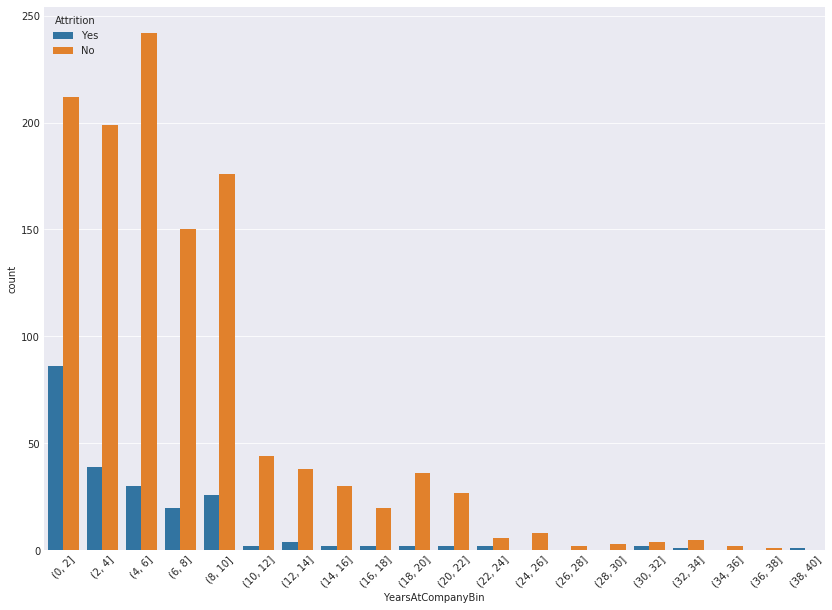

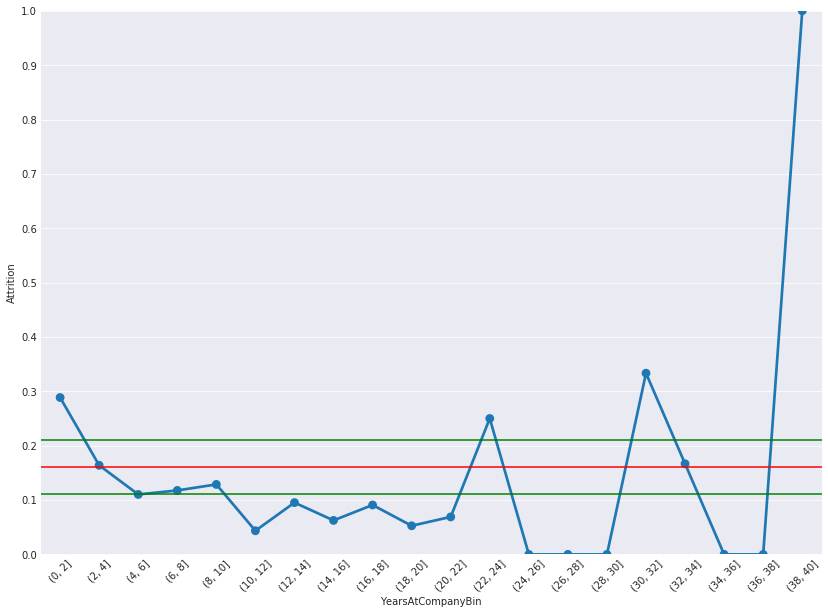

0 - 2 Attrition rate: 0.29
11 - 22 Mean Attrition rate: 0.07


In [340]:
# Years At Company vs. Attrition

yac_attr_rate = data[data.Attrition == 'Yes'].groupby(['YearsAtCompanyBin'])['Attrition'].count() / data.groupby(['YearsAtCompanyBin'])['Attrition'].count()
yac_attr_rate = yac_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='YearsAtCompanyBin', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=yac_attr_rate.index, y=yac_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("0 - 2 Attrition rate: {0:.2f}".format(yac_attr_rate[0]))
print("11 - 22 Mean Attrition rate: {0:.2f}".format(yac_attr_rate[5:11].mean()))

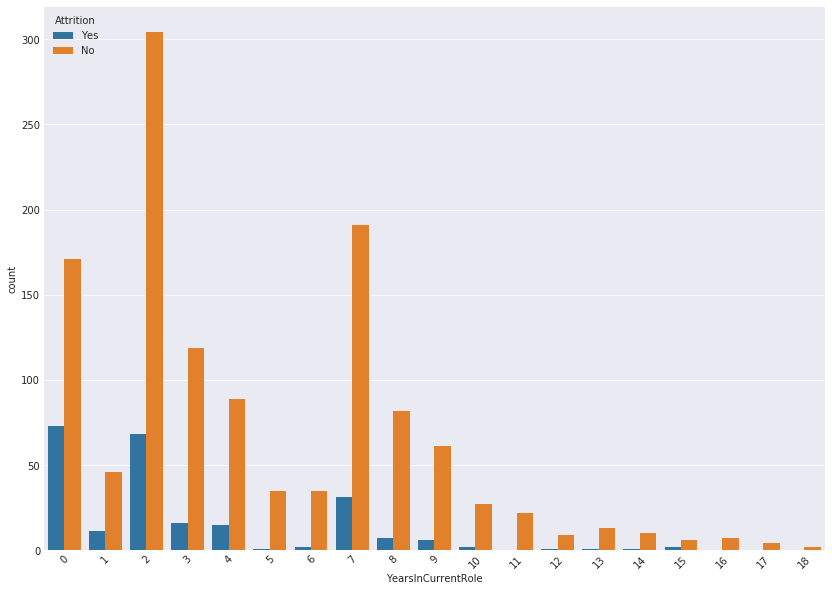

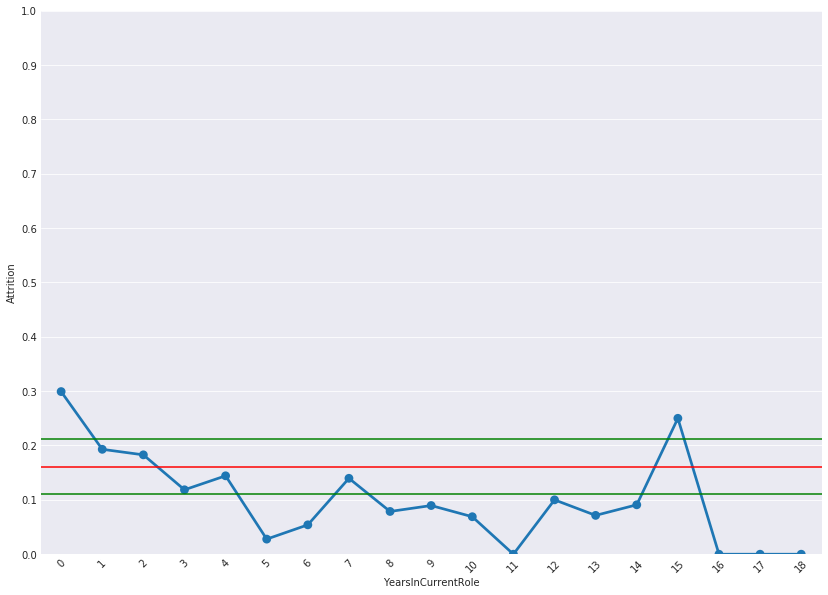

Under A Year (0) Attrition rate: 0.30
5 - 14 Years Means Attrition rate: 0.07


In [347]:
# Years In Current Role vs. Attrition

yicr_attr_rate = data[data.Attrition == 'Yes'].groupby(['YearsInCurrentRole'])['Attrition'].count() / data.groupby(['YearsInCurrentRole'])['Attrition'].count()
yicr_attr_rate = yicr_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=yicr_attr_rate.index, y=yicr_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

print("Under A Year (0) Attrition rate: {0:.2f}".format(yicr_attr_rate[0]))
print("5 - 14 Years Means Attrition rate: {0:.2f}".format(yicr_attr_rate[5:15].mean()))

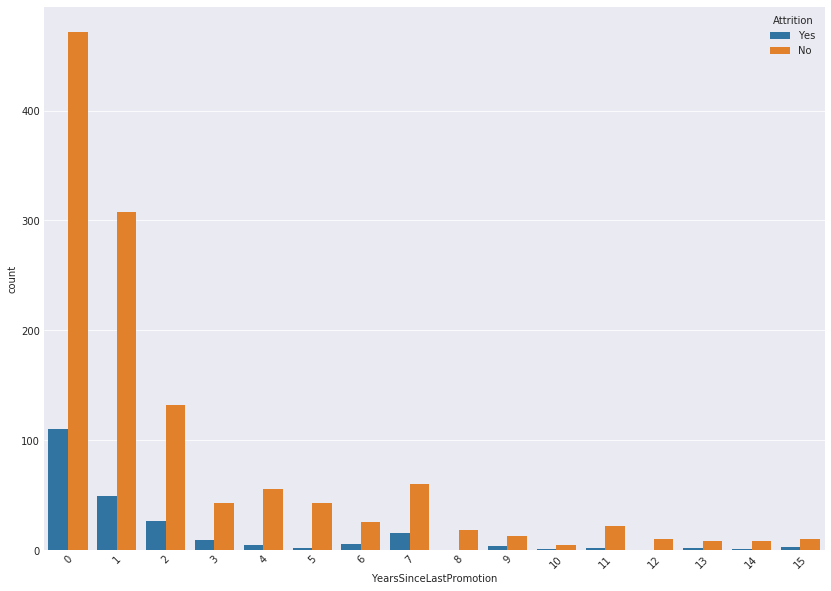

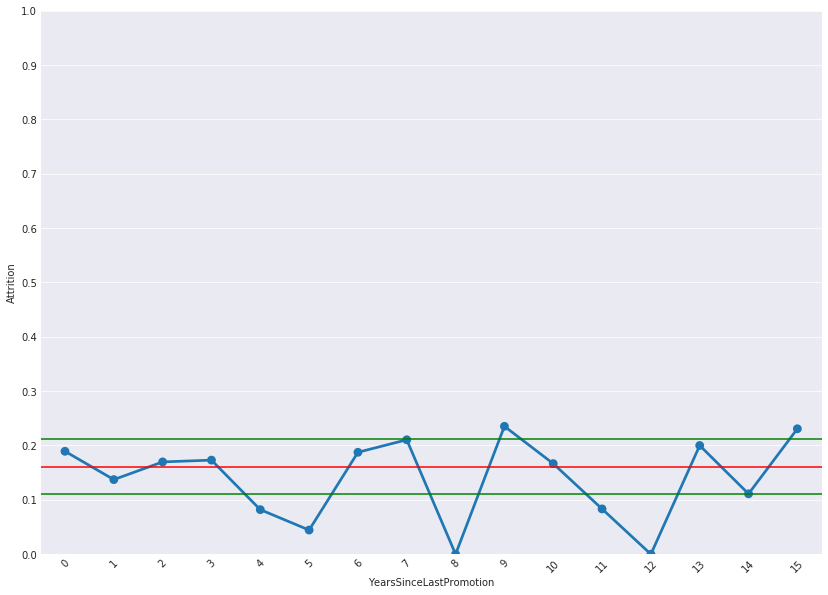

In [348]:
# Years Since Last Promotion vs. Attrition

yslr_attr_rate = data[data.Attrition == 'Yes'].groupby(['YearsSinceLastPromotion'])['Attrition'].count() / data.groupby(['YearsSinceLastPromotion'])['Attrition'].count()
yslr_attr_rate = yslr_attr_rate.fillna(0)

plt.figure(figsize=(14,10))
g = sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(14,10))
g = sns.pointplot(x=yslr_attr_rate.index, y=yslr_attr_rate)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.axhline(y=mean_attrition_rate+normal_buffer, color='g')
plt.axhline(y=mean_attrition_rate, color='r')
plt.axhline(y=mean_attrition_rate-normal_buffer, color='g')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Good Attrition Signals:
- Age
  - 34 - 49: 0.10
- Business Travel
  - Non-Travel: 0.08
- Years At Company
  - 11 - 22: 0.07
- Years In Current Role
  - 5 - 14: 0.07

Bad Attrition Signals:
- Age
  - 18 - 33: 0.31
- Business Travel
  - Travel Frequently: 0.25
- Salary
  - 10 - 20 Percentile (63,128 - 101,868): 0.25
- Education Field
  - Marketing: 0.22
  - Technical Degree: 0.24
  - Human Resources: 0.26
- Work Life Balance
  - 1 'Bad': 0.31
- Years At Company
  - 0 - 2: 0.29
- years In Current Role
  - Under A Year (0): 0.30